In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

template_path = '/Users/y1u0d2/Desktop/Project/qe/template'
target_dir = '/Users/y1u0d2/Desktop/Project/qe/wip'
output_dir = '/Users/y1u0d2/Desktop/Project/qe/template'

In [2]:
lattice_range = np.arange(1.7, 6.3, 0.5)

with open(f'{template_path}/scf.in') as f:
    l_strip = [s.strip() for s in f.readlines()]
    cell_start_index = l_strip.index('CELL_PARAMETERS {angstrom}')
    a_axis = l_strip[cell_start_index+1]
    b_axis = l_strip[cell_start_index+2]
    c_axis = l_strip[cell_start_index+3]

In [3]:
def change_lattice_coord(offset, axis, lattice):
    axis = axis.split(' ')
    axis[offset] = lattice
    axis = ' '.join(axis)
    return axis

lattice = '3.5'
a_axis = change_lattice_coord(0, a_axis, lattice)
b_axis = change_lattice_coord(1, b_axis, lattice)
c_axis = change_lattice_coord(2, c_axis, lattice)

output_lines = l_strip.copy()
output_lines[cell_start_index+1] = a_axis
output_lines[cell_start_index+2] = b_axis
output_lines[cell_start_index+3] = c_axis

In [4]:
filename = 'sample.in'
with open(f'{target_dir}/{filename}', mode='w') as f:
    f.write('\n'.join(output_lines))

In [5]:
for lattice in lattice_range:
    lattice = str('{:.2f}'.format(lattice))
    print(lattice)

1.70
2.20
2.70
3.20
3.70
4.20
4.70
5.20
5.70
6.20


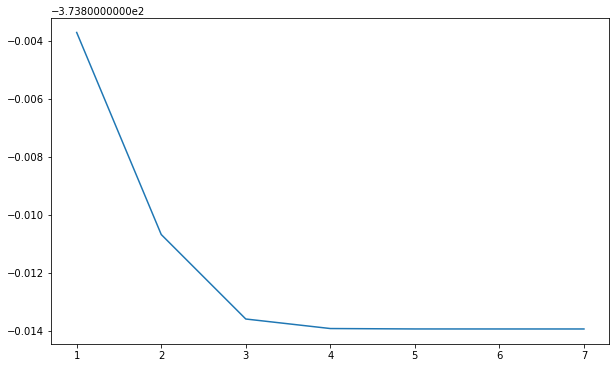

In [6]:
with open(f'{output_dir}/scf.out') as f:
    l_strip = [s.strip() for s in f.readlines()]
    
l_strip = list(filter(lambda l: 'total energy' in l, l_strip))
l_strip = [list(filter(lambda l: l != '', line.split(' '))) for line in l_strip]
energy_list = [float(line[-2]) for line in l_strip if 'Ry' in line]

energy_list = list(dict.fromkeys(energy_list))
x = range(1, len(energy_list)+1)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(x, energy_list)

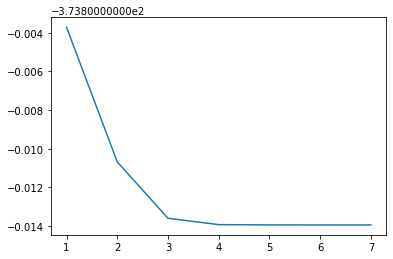

In [7]:
x = range(1, len(energy_list)+1)
plt.plot(x, energy_list)

In [8]:
energy_list

[-373.80371337,
 -373.81068264,
 -373.81359709,
 -373.8139257,
 -373.81394011,
 -373.81394079,
 -373.81394078]

In [9]:
output_dir = '/Users/y1u0d2/desktop/Lab/qe/auto_supercell_fcc'
def get_energy_list(filename):
    with open(f'{output_dir}/{filename}') as f:
        l_strip = [s.strip() for s in f.readlines()]
    
    l_strip = list(filter(lambda l: 'total energy' in l, l_strip))
    l_strip = [list(filter(lambda l: l != '', line.split(' '))) for line in l_strip]
    energy_list = [float(line[-2]) for line in l_strip if 'Ry' in line]
    energy_list = list(dict.fromkeys(energy_list)) #重複削除(multiprocess時)
    return energy_list

In [10]:
energy_list = get_energy_list('scf_3.20.out')

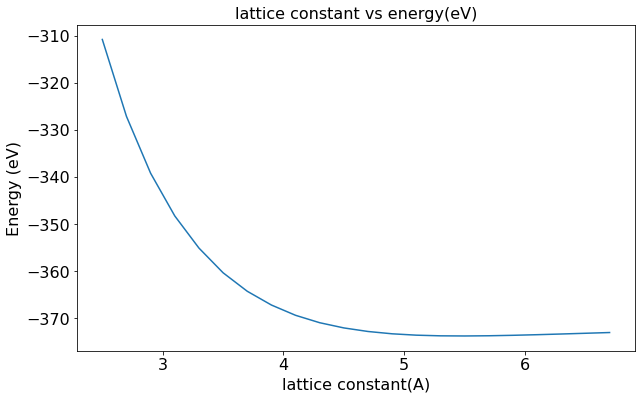

In [11]:
output_dir = '/Users/y1u0d2/desktop/Lab/qe/auto_2'
ry_to_ev = 13.60
def get_energy_list(filename):
    with open(f'{output_dir}/{filename}') as f:
        l_strip = [s.strip() for s in f.readlines()]
    
    l_strip = list(filter(lambda l: 'total energy' in l, l_strip))
    l_strip = [list(filter(lambda l: l != '', line.split(' '))) for line in l_strip]
    energy_list = [float(line[-2]) for line in l_strip if 'Ry' in line]
    energy_list = list(dict.fromkeys(energy_list)) #重複削除(multiprocess時)
    return energy_list

lattice_range = np.arange(2.5, 6.9, 0.2)
vol_list = []
total_energy_list = []
for lattice in lattice_range:
    lattice = str('{:.2f}'.format(lattice))
    energy_list = get_energy_list(f'scf_{lattice}.out')
    total_energy_list.append(energy_list[-1])
    vol_list.append(round(float(lattice)**3, 3))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
# ax.set_title(f'volume vs energy(Ry)')
ax.set_title(f'lattice constant vs energy(eV)', fontsize=16)
# ax.set_xlabel('volume(A^3)')
ax.set_xlabel('lattice constant(A)', fontsize=16)
ax.set_ylabel('Energy (eV)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.plot(lattice_range, total_energy_list)
# ax.plot(vol_list, total_energy_list)

In [12]:
lattice_range

array([2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9,
       5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7])